# Pre-processing a json text file challenge

# 1. Import and Clean the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/data_analyst_challenge_test_data.json"
df = pd.read_json(path)

print(df)
print('\n')
print(df.index)


           shape      color     area
0    square-  \n    yellow    9409.0
1       circle\n    yell ow   4071.5
2       triangle       blu3   2028.0
3      squares\n       b1u3   3025.0
4      squares\n       blue   9216.0
..           ...        ...      ...
995  square-  \n      green     81.0
996       squ4re     yellow   4624.0
997       circle     greeen  24884.6
998    squares\n    yelow\n   7396.0
999       circle      red .  15836.8

[1000 rows x 3 columns]


RangeIndex(start=0, stop=1000, step=1)


In [ ]:
# print the dataframe to understand what the values look like.
 
df.head()

,shape,color,area
0,square- \n,yellow,9409.0
1,circle\n,yell ow,4071.5
2,triangle,blu3,2028.0
3,squares\n,b1u3,3025.0
4,squares\n,blue,9216.0


In [ ]:
# Use the string similarity ratio to pre-process the text data

from difflib import SequenceMatcher

shapes_list = ['square', 'circle', 'triangle']
colors_list = ['yellow', 'blue', 'green', 'red']


def similar(row, col):
    max_similar_ratio = 0
    most_similar = None
    
    if col == 'shape':
        for shape in shapes_list:
            similar_ratio = SequenceMatcher(None, row['shape'], shape).ratio()
            if similar_ratio > max_similar_ratio:
                max_similar_ratio = similar_ratio
                most_similar = shape
    elif col == 'color':
        for color in colors_list:
            similar_ratio = SequenceMatcher(None, row['color'], color).ratio()
            if similar_ratio > max_similar_ratio:
                max_similar_ratio = similar_ratio
                most_similar = color

    return most_similar


df['shape'] = df[['shape']].apply(lambda row: similar(row, 'shape'), axis=1)
df['color'] = df[['color']].apply(lambda row: similar(row, 'color'), axis=1)



In [ ]:
df

,shape,color,area
0,square,yellow,9409.0
1,circle,yellow,4071.5
2,triangle,blue,2028.0
3,square,blue,3025.0
4,square,blue,9216.0
...,...,...,...
995,square,green,81.0
996,square,yellow,4624.0
997,circle,green,24884.6
998,square,yellow,7396.0


In [ ]:
''' ALTERNATIVELY, WE COULD MANNUALLY CLEAN THE TEXT DATA.

#CLEAN SHAPE COLUMN

shape= pd.DataFrame(df, columns=['shape'])
print(shape)

# clean the 'shape' column
print(df['shape'].unique())

shape_change1= ["-", "\n"]
shape_change2 = ["squares", "squ4re", "square    ", "square ", ]
shape_change3= ["circle "]
for char in shape_change1:
    df['shape'] = df['shape'].str.replace(char, ' ')

for char in shape_change2:
    df['shape'] = df['shape'].str.replace(char, 'square')

for char in shape_change3:
    df['shape'] = df['shape'].str.replace(char, 'circle')

print(df['shape'].unique())  '''




           shape
0    square-  \n
1       circle\n
2       triangle
3      squares\n
4      squares\n
..           ...
995  square-  \n
996       squ4re
997       circle
998    squares\n
999       circle

[1000 rows x 1 columns]


In [ ]:
''' CLEAN COLOR COLUMN

print(df['color'].unique())

clean_yellow = ["  yellow ", "yell ow", "yell0w\n\n", "yellow", "y3llow", "yellow\n", "yelow\n"]
clean_green = ["greeen", "gr3en", "grean", "  green.\n", "gren"]
clean_blue = ["  blu3", "b1u3", "blue\n.", "blue .", " blue  \n", " blue\n", "b1ue"]
clean_red = ["red  \n]", "red .", "  red\n", "r3d' ", "_red", "r3d"]

for char in clean_yellow:
    df['color'] = df['color'].str.replace(char, 'yellow')

for char in clean_green:
    df['color'] = df['color'].str.replace(char, 'green')

for char in clean_blue:
    df['color'] = df['color'].str.replace(char, 'blue')

for char in clean_red:
    df['color'] = df['color'].str.replace(char, 'red')

print(df['color'].unique()) '''

['  yellow ' 'yell ow' '  blu3' 'b1u3' 'blue' 'yellow' 'red' 'red  \n]'
 '  green.\n' 'blue\n.' 'blue .' 'yell0w\n\n' 'red .' 'green' 'yellow\n'
 'greeen' 'gr3en' 'b1ue' 'red  ' 'yelow\n' '  red\n' 'r3d' ' blue  \n'
 'grean' 'y3llow' 'gren' '_red']


# 2. Draw a boxplot to illustrate distribution of each shape's area

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df.groupby(['shape', 'color']).size()

shape     color 
circle    blue        9
          green      31
          red        30
          yellow     50
square    blue      152
          green      47
          red        56
          yellow    222
triangle  blue      199
          red       204
dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


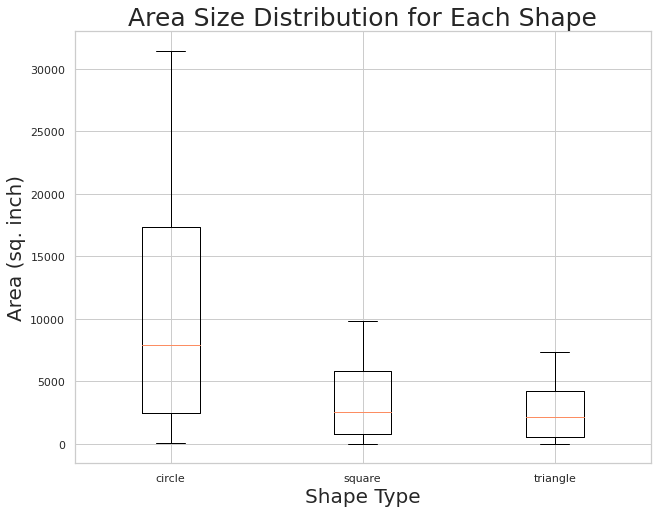

In [ ]:
data_square = df[df['shape']=='square']['area'].values
data_circle = df[df['shape']=='circle']['area'].values
data_triangle = df[df['shape']=='triangle']['area'].values

data = [data_circle, data_square, data_triangle]

shape = ('circle', 'square','triangle')

fig = plt.figure(figsize = (8,6))

ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(shape)
bp = ax.boxplot(data)

plt.xlabel('Shape Type', fontsize = 20)
plt.ylabel('Area (sq. inch)', fontsize = 20)
plt.title('Area Size Distribution for Each Shape', fontsize = 25)
plt.show()

Text(0, 0.5, 'Area (sq. inch)')

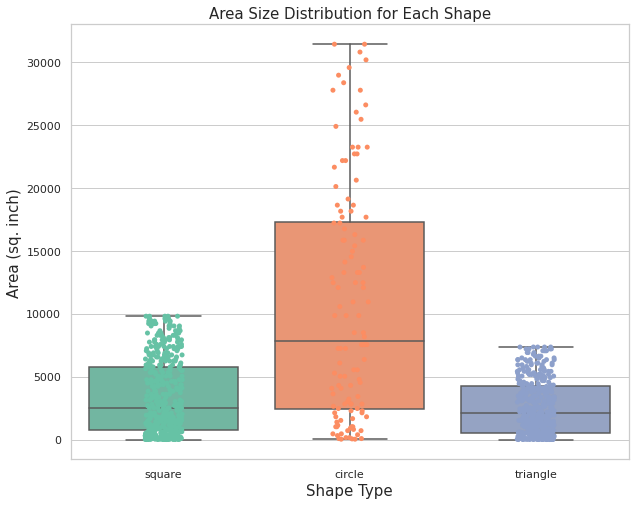

In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(10,8)})
sns.set_palette("Set2")
sns.set_style('whitegrid')
ax= sns.boxplot(x='shape',y='area',data=df)
ax = sns.stripplot(x='shape',y='area',data=df)

ax.set_title("Area Size Distribution for Each Shape", fontsize = 15)
ax.set_xlabel("Shape Type", fontsize = 15)
ax.set_ylabel("Area (sq. inch)", fontsize = 15)


# 3. Descriptive stat for area of each color 

In [ ]:
df

,shape,color,area
0,square,yellow,9409.0
1,circle,yellow,4071.5
2,triangle,blue,2028.0
3,square,blue,3025.0
4,square,blue,9216.0
...,...,...,...
995,square,green,81.0
996,square,yellow,4624.0
997,circle,green,24884.6
998,square,yellow,7396.0


In [ ]:
# group the dataframe by color

group_by_color = df.groupby('color')['area']
dict_color = dict(list(group_by_color))

# Generate descriptive statistics
group_by_color.describe()[['count', 'mean', 'min', 'max', 'std']]




,count,mean,min,max,std
color,,,,,
blue,360.0,3208.131667,0.8,21642.4,3039.212965
green,78.0,5761.119231,1.0,27759.1,6695.029606
red,290.0,3815.871034,0.8,31415.9,5092.678377
yellow,272.0,4538.208088,1.0,31415.9,5352.460578


# 4. What is the average area of a yellow square?

The average area of a yellow square is 3333 sq. inch.

# 5. Which shape is most likely to be green?

A circle is most likely to be green.

In [ ]:
df.groupby('color')['shape'].value_counts(normalize=False) 

color   shape   
blue    triangle    199
        square      152
        circle        9
green   square       47
        circle       31
red     triangle    204
        square       56
        circle       30
yellow  square      222
        circle       50
Name: shape, dtype: int64

In [ ]:
#calculate the ratio for square in green:
47 / (152+47+56+222) *100

9.853249475890985

In [ ]:
#calculate the ratio for circle in green:
31 / (9+31+30+50)*100

25.833333333333336

# 6. Given the fact that an object is red and has an area larger than 3,000 in2, what are the chances the object is a square, a triangle, or a circle?

When an object is red and has an area larger than 3,000 in2, the probabilities that the object is a square, a triangle, or a circle are **16%, 16.8%, and 67.2% respectively.**

In [ ]:
red = df[df.color=='red'] 
red= red[red.area >3000]

red

,shape,color,area
7,triangle,red,4563.0
9,triangle,red,5043.0
24,triangle,red,3996.8
30,triangle,red,4446.8
38,square,red,5929.0
...,...,...,...
962,triangle,red,5292.0
963,triangle,red,3996.8
968,triangle,red,5166.8
978,triangle,red,3366.8


In [ ]:
len(red.index)

125

There are 125 objects that are red and has the area larger than 3000 sqin. 

In [ ]:
red = red.reset_index()

red_shape = red.groupby(['shape'])

red_shape = red_shape['shape'].agg('count')

print(red_shape)

shape
circle      20
square      21
triangle    84
Name: shape, dtype: int64


In [ ]:
count_circle = red.loc[red['shape'] == 'circle'].count()
count_square = red.loc[red['shape'] == 'square'].count()
count_triangle = red.loc[red['shape'] == 'triangle'].count()

In [ ]:
percentage = lambda x : x/float(len(red.index)) *100
percent_circle = percentage(count_circle['index'])
print("probability that the object is circle:", percent_circle)

percent_sqr = percentage(count_square['index'])
print("probability that the object is square:", percent_sqr)

percent_tri = percentage(count_triangle['index'])
print("probability that the object is triangle:",percent_tri)


probability that the object is circle: 16.0
probability that the object is square: 16.8
probability that the object is triangle: 67.2


#7 Write a function that calculates the side or radius of an object, depending on the shape and area of the object.

For the purpose of this exercise, I assume that all polygons are regular.

In [ ]:
df['num_of_size'] = " "

def side(input):
    print(input)
    if input['shape'] == "circle":
        return 0
    elif input['shape'] == "square":
        return 4
    else: 
        return 3

 
# append the value to the num_of_size column
df['num_of_size'] = df[['shape']].apply(lambda row: side(row), axis=1)

shape    square
Name: 0, dtype: object
shape    circle
Name: 1, dtype: object
shape    triangle
Name: 2, dtype: object
shape    square
Name: 3, dtype: object
shape    square
Name: 4, dtype: object
shape    square
Name: 5, dtype: object
shape    circle
Name: 6, dtype: object
shape    triangle
Name: 7, dtype: object
shape    square
Name: 8, dtype: object
shape    triangle
Name: 9, dtype: object
shape    circle
Name: 10, dtype: object
shape    square
Name: 11, dtype: object
shape    square
Name: 12, dtype: object
shape    square
Name: 13, dtype: object
shape    triangle
Name: 14, dtype: object
shape    square
Name: 15, dtype: object
shape    triangle
Name: 16, dtype: object
shape    triangle
Name: 17, dtype: object
shape    square
Name: 18, dtype: object
shape    square
Name: 19, dtype: object
shape    triangle
Name: 20, dtype: object
shape    square
Name: 21, dtype: object
shape    triangle
Name: 22, dtype: object
shape    square
Name: 23, dtype: object
shape    triangle
Name: 24, dtype:

In [ ]:
import math

n = len(df[['area']])

def calculation(input):

    if input['num_of_size'] == 0:
        return math.sqrt(input['area']) / 3.14 

    elif input['num_of_size'] == 4:
        return math.sqrt(input['area'])
    elif input['num_of_size'] == 3:
        return math.sqrt(input['area']) * 4/math.sqrt(3)
      


In [ ]:
df['side'] = df.apply(lambda x: calculation(x), axis=1)

#round the value to the closest int 
df['side'] = df['side'].astype(int)

In [ ]:
df

,shape,color,area,num_of_size,side
0,square,yellow,9409.0,4,97
1,circle,yellow,4071.5,0,20
2,triangle,blue,2028.0,3,104
3,square,blue,3025.0,4,55
4,square,blue,9216.0,4,96
...,...,...,...,...,...
995,square,green,81.0,4,9
996,square,yellow,4624.0,4,68
997,circle,green,24884.6,0,50
998,square,yellow,7396.0,4,86


# 9. Draw a boxplot showing the distribution of values in the "side" column by shape. 

From the below boxplot, we observe that the range of radius size is smaller than the range of triangle side or square side, and that the values are distributed uniformly for all three shapes. 

Although the radius size is smaller than the side (length) of square or triangle, when calculating the areas for each shape, we can infer that the area of circle will increase at a faster speed than that of triangle or square.

This is understandable given that the radius of a circle is equal to the diagonal length of a square, implying that square is inscribed in a circle. 

In [ ]:
df.groupby(['side', 'shape']).size() 

side  shape   
1     circle      2
      square      3
2     circle      3
      square      9
      triangle    3
                 ..
190   triangle    1
192   triangle    3
194   triangle    4
196   triangle    4
198   triangle    5
Length: 246, dtype: int64

Text(0, 0.5, 'Shape')

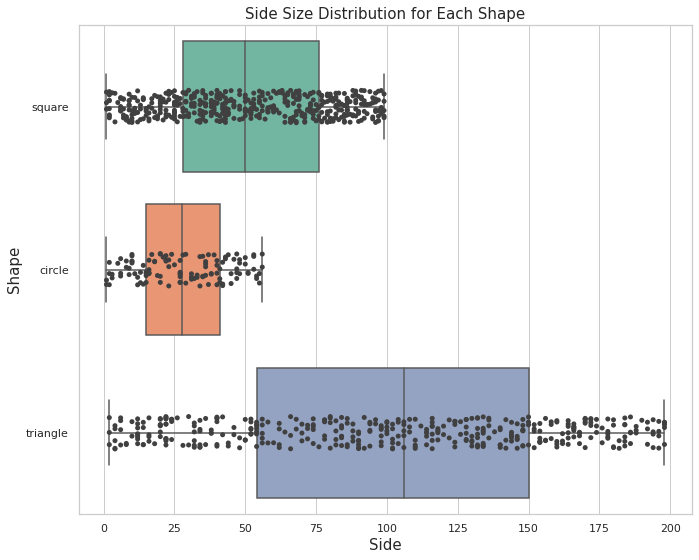

In [ ]:
sns.set(rc = {'figure.figsize':(11,9)})
sns.set_palette("Set2")
sns.set_style('whitegrid')
ax= sns.boxplot(x='side',y='shape',data=df)
ax = sns.stripplot(x='side',y='shape',data=df, color=".25")

ax.set_title("Side Size Distribution for Each Shape", fontsize = 15)
ax.set_xlabel("Side", fontsize = 15)
ax.set_ylabel("Shape", fontsize = 15)


# 10. Make a scatter plot with "side" on the x‐axis and "area" on the y‐axis. Make sure each shape is a different color.

Text(0, 0.5, 'Area (sq inch)')

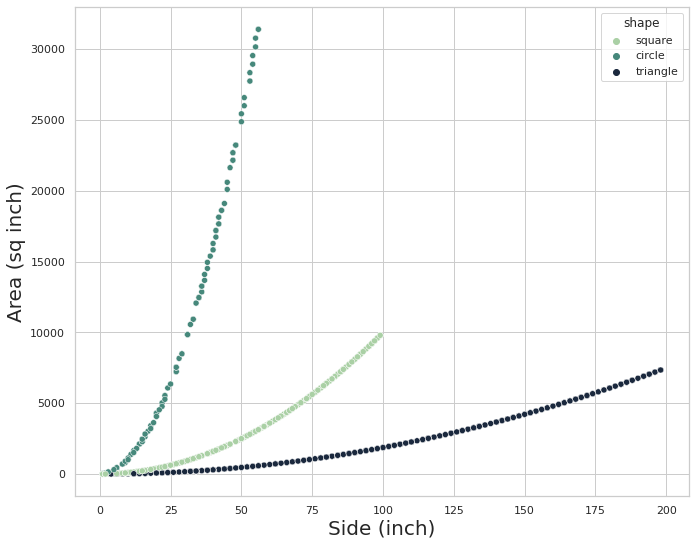

In [ ]:
sns.scatterplot(data=df, x="side", y="area", hue="shape", palette="ch:r=-.5,l=.75", sizes=(20, 200))

plt.xlabel("Side (inch)", fontsize = 20)
plt.ylabel("Area (sq inch)", fontsize = 20)


# 11. Create a dataframe, table, or list that shows the distribution of objects by color (e.g., number and percent of each shape that is in each color).

In [ ]:
df1 = df[['color', 'shape']]

df1 = df1.groupby('color')['shape'].value_counts(normalize=False)

df_new = pd.DataFrame(df1)


#add a new column 'count', and convert 'color' and 'shape' columns as dataframe.
df_new.rename(columns = {'shape':'Count'}, inplace = True)
df_new = df_new.reset_index()

df_new

,color,shape,Count
0,blue,triangle,199
1,blue,square,152
2,blue,circle,9
3,green,square,47
4,green,circle,31
5,red,triangle,204
6,red,square,56
7,red,circle,30
8,yellow,square,222
9,yellow,circle,50


In [ ]:
df_new['percent'] = " "

def percent(input):

  if input['color'] == 'blue':
      return input['Count']/df_new.loc[df_new['color'] == 'blue']['Count'].sum()
  elif input['color'] == 'green':
      return input['Count']/df_new.loc[df_new['color'] == 'green']['Count'].sum()
  elif input['color'] == 'red':
      return input['Count']/df_new.loc[df_new['color'] == 'red']['Count'].sum()
  elif input['color'] == 'yellow':
      return input['Count']/df_new.loc[df_new['color'] == 'yellow']['Count'].sum()

df_new['percent'] = df_new.apply(lambda row: percent(row), axis=1)


In [ ]:
df_new

,color,shape,Count,percent
0,blue,triangle,199,0.552778
1,blue,square,152,0.422222
2,blue,circle,9,0.025000
3,green,square,47,0.602564
4,green,circle,31,0.397436
5,red,triangle,204,0.703448
6,red,square,56,0.193103
7,red,circle,30,0.103448
8,yellow,square,222,0.816176
9,yellow,circle,50,0.183824


## 11 a. What is the distribution of shapes that are red?


The distributions of triangle, square, and circle shapes in red are 0.703, 0.193, and 0.103 respectively.

#12. Create a dataframe, table, or list that shows the distribution of all objects and colors by total area (e.g., share to total area for each shape‐color pair).

In [ ]:
df_new2 = df.drop(columns=['num_of_size', 'side'])

df_new2 = df_new2.groupby(['color', 'shape']).sum()

df_new2 = df_new2.reset_index()

df_new2['share_to_total_area'] = df_new2['area'] / np.sum(df_new2['area'])

df_new2

,color,shape,area,share_to_total_area
0,blue,circle,78665.4,0.019939
1,blue,square,586415.0,0.148637
2,blue,triangle,489847.0,0.124160
3,green,circle,325189.3,0.082425
4,green,square,124178.0,0.031475
5,red,circle,386142.6,0.097874
6,red,square,176625.0,0.044769
7,red,triangle,543835.0,0.137844
8,yellow,circle,494420.6,0.125319
9,yellow,square,739972.0,0.187558


# 13. Create a function that calculates 12. for any given shape and color. Test this function using one of the color‐ shape pairs from the dataframe in 12.

In [ ]:
df

,shape,color,area,num_of_size,side
0,square,yellow,9409.0,4,97
1,circle,yellow,4071.5,0,20
2,triangle,blue,2028.0,3,104
3,square,blue,3025.0,4,55
4,square,blue,9216.0,4,96
...,...,...,...,...,...
995,square,green,81.0,4,9
996,square,yellow,4624.0,4,68
997,circle,green,24884.6,0,50
998,square,yellow,7396.0,4,86


In [ ]:
def share2totalarea(df, shape, color):
    total_area = df['area'].sum()
    return df[(df['shape']==shape) & (df['color']==color)]['area'].sum() / total_area 

In [ ]:
#test the function using a shape-color pair

shape = 'circle'
color = 'red'
share2totalarea(df, shape, color)

0.09787432857595586